In [2]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os


In [3]:
load_dotenv()

server = os.getenv("SERVER_NAME")
database = os.getenv("SERVER_DATABASE")
driver = os.getenv("SERVER_DRIVER")

connection_str = f'mssql+pyodbc://@{server}/{database}?driver={driver}&trusted_connection=yes'

engine =create_engine(connection_str)

query = """
SELECT 
    DATEADD(week, DATEDIFF(week, 0, time_purchase), 0) as Periodo, 
    COUNT(ORDEN_ID) as Ventas
FROM dbo.FACT_Ordenes
GROUP BY DATEADD(week, DATEDIFF(week, 0, time_purchase), 0)
ORDER BY Periodo ASC;
"""

In [4]:
df = pd.read_sql_query(query, engine)

df['Periodo'] = pd.to_datetime(df['Periodo'])
df = df.set_index('Periodo').to_period('W')

for index, row in df.iterrows():
    print(f"Periodo: {index} - Ventas: {row['Ventas']}")

Periodo: 2016-10-03/2016-10-09 - Ventas: 211
Periodo: 2016-10-10/2016-10-16 - Ventas: 54
Periodo: 2016-12-19/2016-12-25 - Ventas: 1
Periodo: 2017-01-02/2017-01-08 - Ventas: 40
Periodo: 2017-01-09/2017-01-15 - Ventas: 63
Periodo: 2017-01-16/2017-01-22 - Ventas: 173
Periodo: 2017-01-23/2017-01-29 - Ventas: 330
Periodo: 2017-01-30/2017-02-05 - Ventas: 390
Periodo: 2017-02-06/2017-02-12 - Ventas: 524
Periodo: 2017-02-13/2017-02-19 - Ventas: 403
Periodo: 2017-02-20/2017-02-26 - Ventas: 344
Periodo: 2017-02-27/2017-03-05 - Ventas: 433
Periodo: 2017-03-06/2017-03-12 - Ventas: 550
Periodo: 2017-03-13/2017-03-19 - Ventas: 598
Periodo: 2017-03-20/2017-03-26 - Ventas: 616
Periodo: 2017-03-27/2017-04-02 - Ventas: 545
Periodo: 2017-04-03/2017-04-09 - Ventas: 557
Periodo: 2017-04-10/2017-04-16 - Ventas: 442
Periodo: 2017-04-17/2017-04-23 - Ventas: 506
Periodo: 2017-04-24/2017-04-30 - Ventas: 660
Periodo: 2017-05-01/2017-05-07 - Ventas: 713
Periodo: 2017-05-08/2017-05-14 - Ventas: 742
Periodo: 2017-0

In [5]:
periodos = [
    "2016-10-03/2016-10-09",
    "2016-10-10/2016-10-16",
    "2016-12-19/2016-12-25",
    "2018-08-27/2018-09-02"
]

df = df.drop(periodos)

for index, row in df.iterrows():
    print(f"Periodo: {index} - Ventas: {row['Ventas']}")

Periodo: 2017-01-02/2017-01-08 - Ventas: 40
Periodo: 2017-01-09/2017-01-15 - Ventas: 63
Periodo: 2017-01-16/2017-01-22 - Ventas: 173
Periodo: 2017-01-23/2017-01-29 - Ventas: 330
Periodo: 2017-01-30/2017-02-05 - Ventas: 390
Periodo: 2017-02-06/2017-02-12 - Ventas: 524
Periodo: 2017-02-13/2017-02-19 - Ventas: 403
Periodo: 2017-02-20/2017-02-26 - Ventas: 344
Periodo: 2017-02-27/2017-03-05 - Ventas: 433
Periodo: 2017-03-06/2017-03-12 - Ventas: 550
Periodo: 2017-03-13/2017-03-19 - Ventas: 598
Periodo: 2017-03-20/2017-03-26 - Ventas: 616
Periodo: 2017-03-27/2017-04-02 - Ventas: 545
Periodo: 2017-04-03/2017-04-09 - Ventas: 557
Periodo: 2017-04-10/2017-04-16 - Ventas: 442
Periodo: 2017-04-17/2017-04-23 - Ventas: 506
Periodo: 2017-04-24/2017-04-30 - Ventas: 660
Periodo: 2017-05-01/2017-05-07 - Ventas: 713
Periodo: 2017-05-08/2017-05-14 - Ventas: 742
Periodo: 2017-05-15/2017-05-21 - Ventas: 878
Periodo: 2017-05-22/2017-05-28 - Ventas: 805
Periodo: 2017-05-29/2017-06-04 - Ventas: 797
Periodo: 201

In [6]:
y = df['Ventas'].asfreq('W-MON')

In [7]:
black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': pd.to_datetime(['2017-11-24', '2018-11-23']), 
  'lower_window': -4, 
  'upper_window': 2,
})

In [8]:
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

y_train, y_test = temporal_train_test_split(y, test_size=8)

fh = ForecastingHorizon(y_test.index, is_relative=False)

black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': pd.to_datetime(['2017-11-24', '2018-11-23']),
  'lower_window': -4,
  'upper_window': 2,
})

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False, # Ya es semanal
    holidays=black_friday
)

d:\Ulima-IngSistemas\Ciclo VIII\SIE\ForecastingOlistE-commerce\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


16:45:31 - cmdstanpy - INFO - Chain [1] start processing
16:45:31 - cmdstanpy - INFO - Chain [1] done processing


El margen de error del modelo es: 20.56%


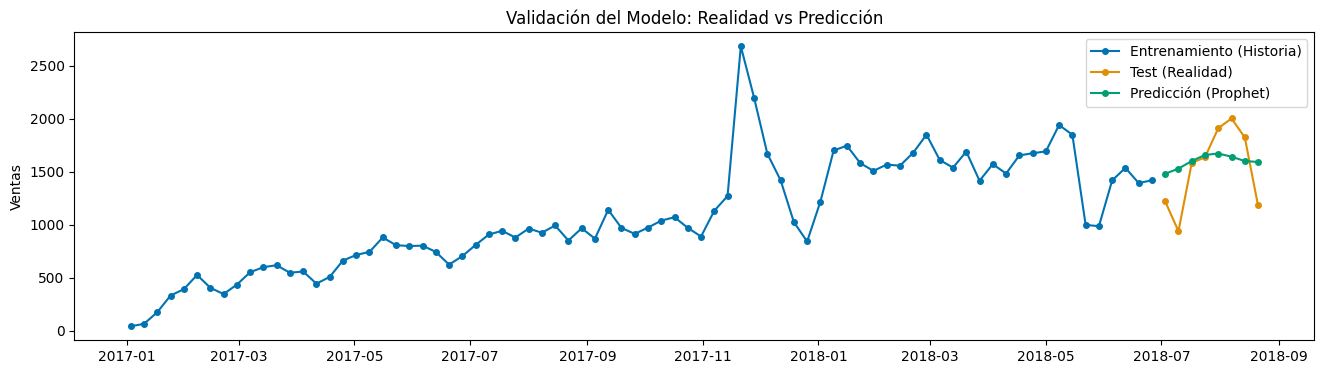

In [9]:
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series

model.fit(y_train)

y_pred = model.predict(fh)

mape = MeanAbsolutePercentageError(symmetric=False)
error = mape(y_test, y_pred)

print(f"El margen de error del modelo es: {error:.2%}")

plot_series(y_train, y_test, y_pred, labels=["Entrenamiento (Historia)", "Test (Realidad)", "Predicción (Prophet)"])
plt.title("Validación del Modelo: Realidad vs Predicción")
plt.show()

16:45:34 - cmdstanpy - INFO - Chain [1] start processing
16:45:35 - cmdstanpy - INFO - Chain [1] done processing


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ventas'>)

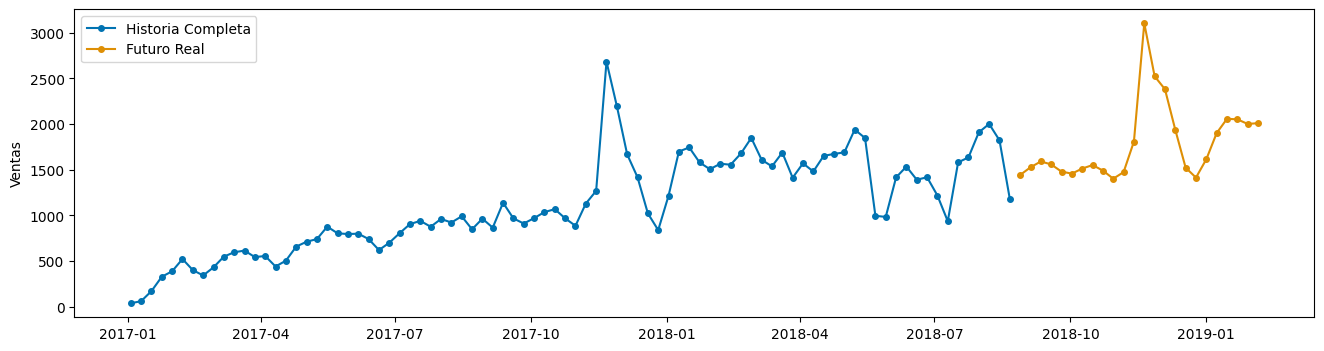

In [10]:
model.fit(y) # Train with ALL data, not only train set
fh_futuro = ForecastingHorizon(range(1, 25), is_relative=True) # 12 weeks into future
y_futuro = model.predict(fh_futuro)
plot_series(y, y_futuro, labels=["Historia Completa", "Futuro Real"])

In [13]:
from sktime.forecasting.model_selection import ForecastingGridSearchCV, SlidingWindowSplitter

param_grid = {
    'changepoint_prior_scale': [0.001, 0.05, 0.1, 0.3, 0.5], # De muy rígido a muy flexible
    'seasonality_prior_scale': [0.01, 1.0, 10.0, 20.0],       # De ignorar ciclos a forzarlos
    'seasonality_mode': ['additive', 'multiplicative']  # Probar ambos modos
}


cv = SlidingWindowSplitter(initial_window=50, window_length=10, step_length=5) 

gscv = ForecastingGridSearchCV(
    forecaster=model,
    cv=cv,
    param_grid=param_grid,
    scoring=MeanAbsolutePercentageError(symmetric=False),
    verbose=1
)

print("Finding best HPs...")
gscv.fit(y) # use all times data fot hp tuning

print("Best parameters found:")
print(gscv.best_params_)
print(f"Best score (Estimated MAPE): {gscv.best_score_:.2%}")

best_model = gscv.best_forecaster_

Finding best HPs...
Fitting 8 folds for each of 40 candidates, totalling 320 fits


16:58:18 - cmdstanpy - INFO - Chain [1] start processing
16:58:19 - cmdstanpy - INFO - Chain [1] done processing
16:58:19 - cmdstanpy - INFO - Chain [1] start processing
16:58:20 - cmdstanpy - INFO - Chain [1] done processing


Best parameters found:
{'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}
Best score (Estimated MAPE): 21.09%


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ventas'>)

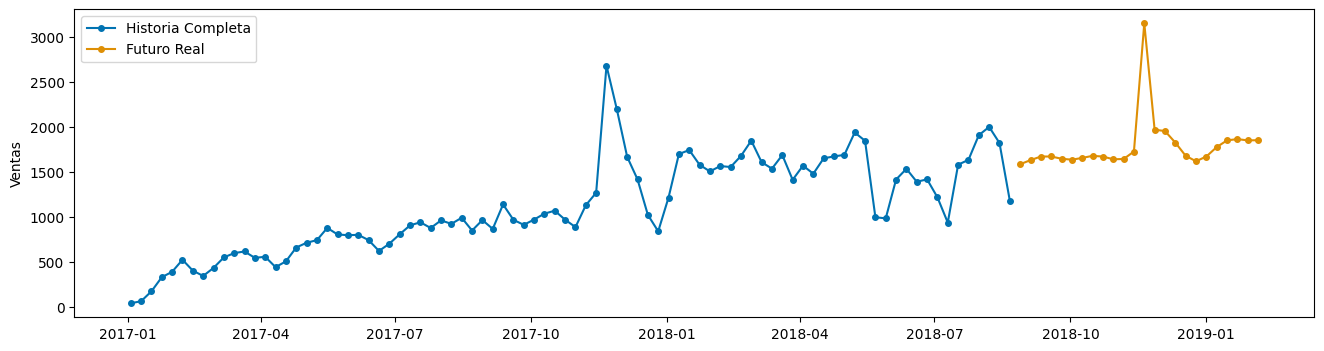

In [14]:
fh_futuro = ForecastingHorizon(range(1, 25), is_relative=True) # 24 weeks into future (2 months)
y_futuro = best_model.predict(fh_futuro)
plot_series(y, y_futuro, labels=["Historia Completa", "Futuro Real"])